Lab-01: Write a program to execute the following image pre-processing.
• Read images from a folder.
• Resize images and save to a folder.
• Apply color transform on images and save to a folder.
• Normalize images and save into a folder.
• Filter images and save into a folder

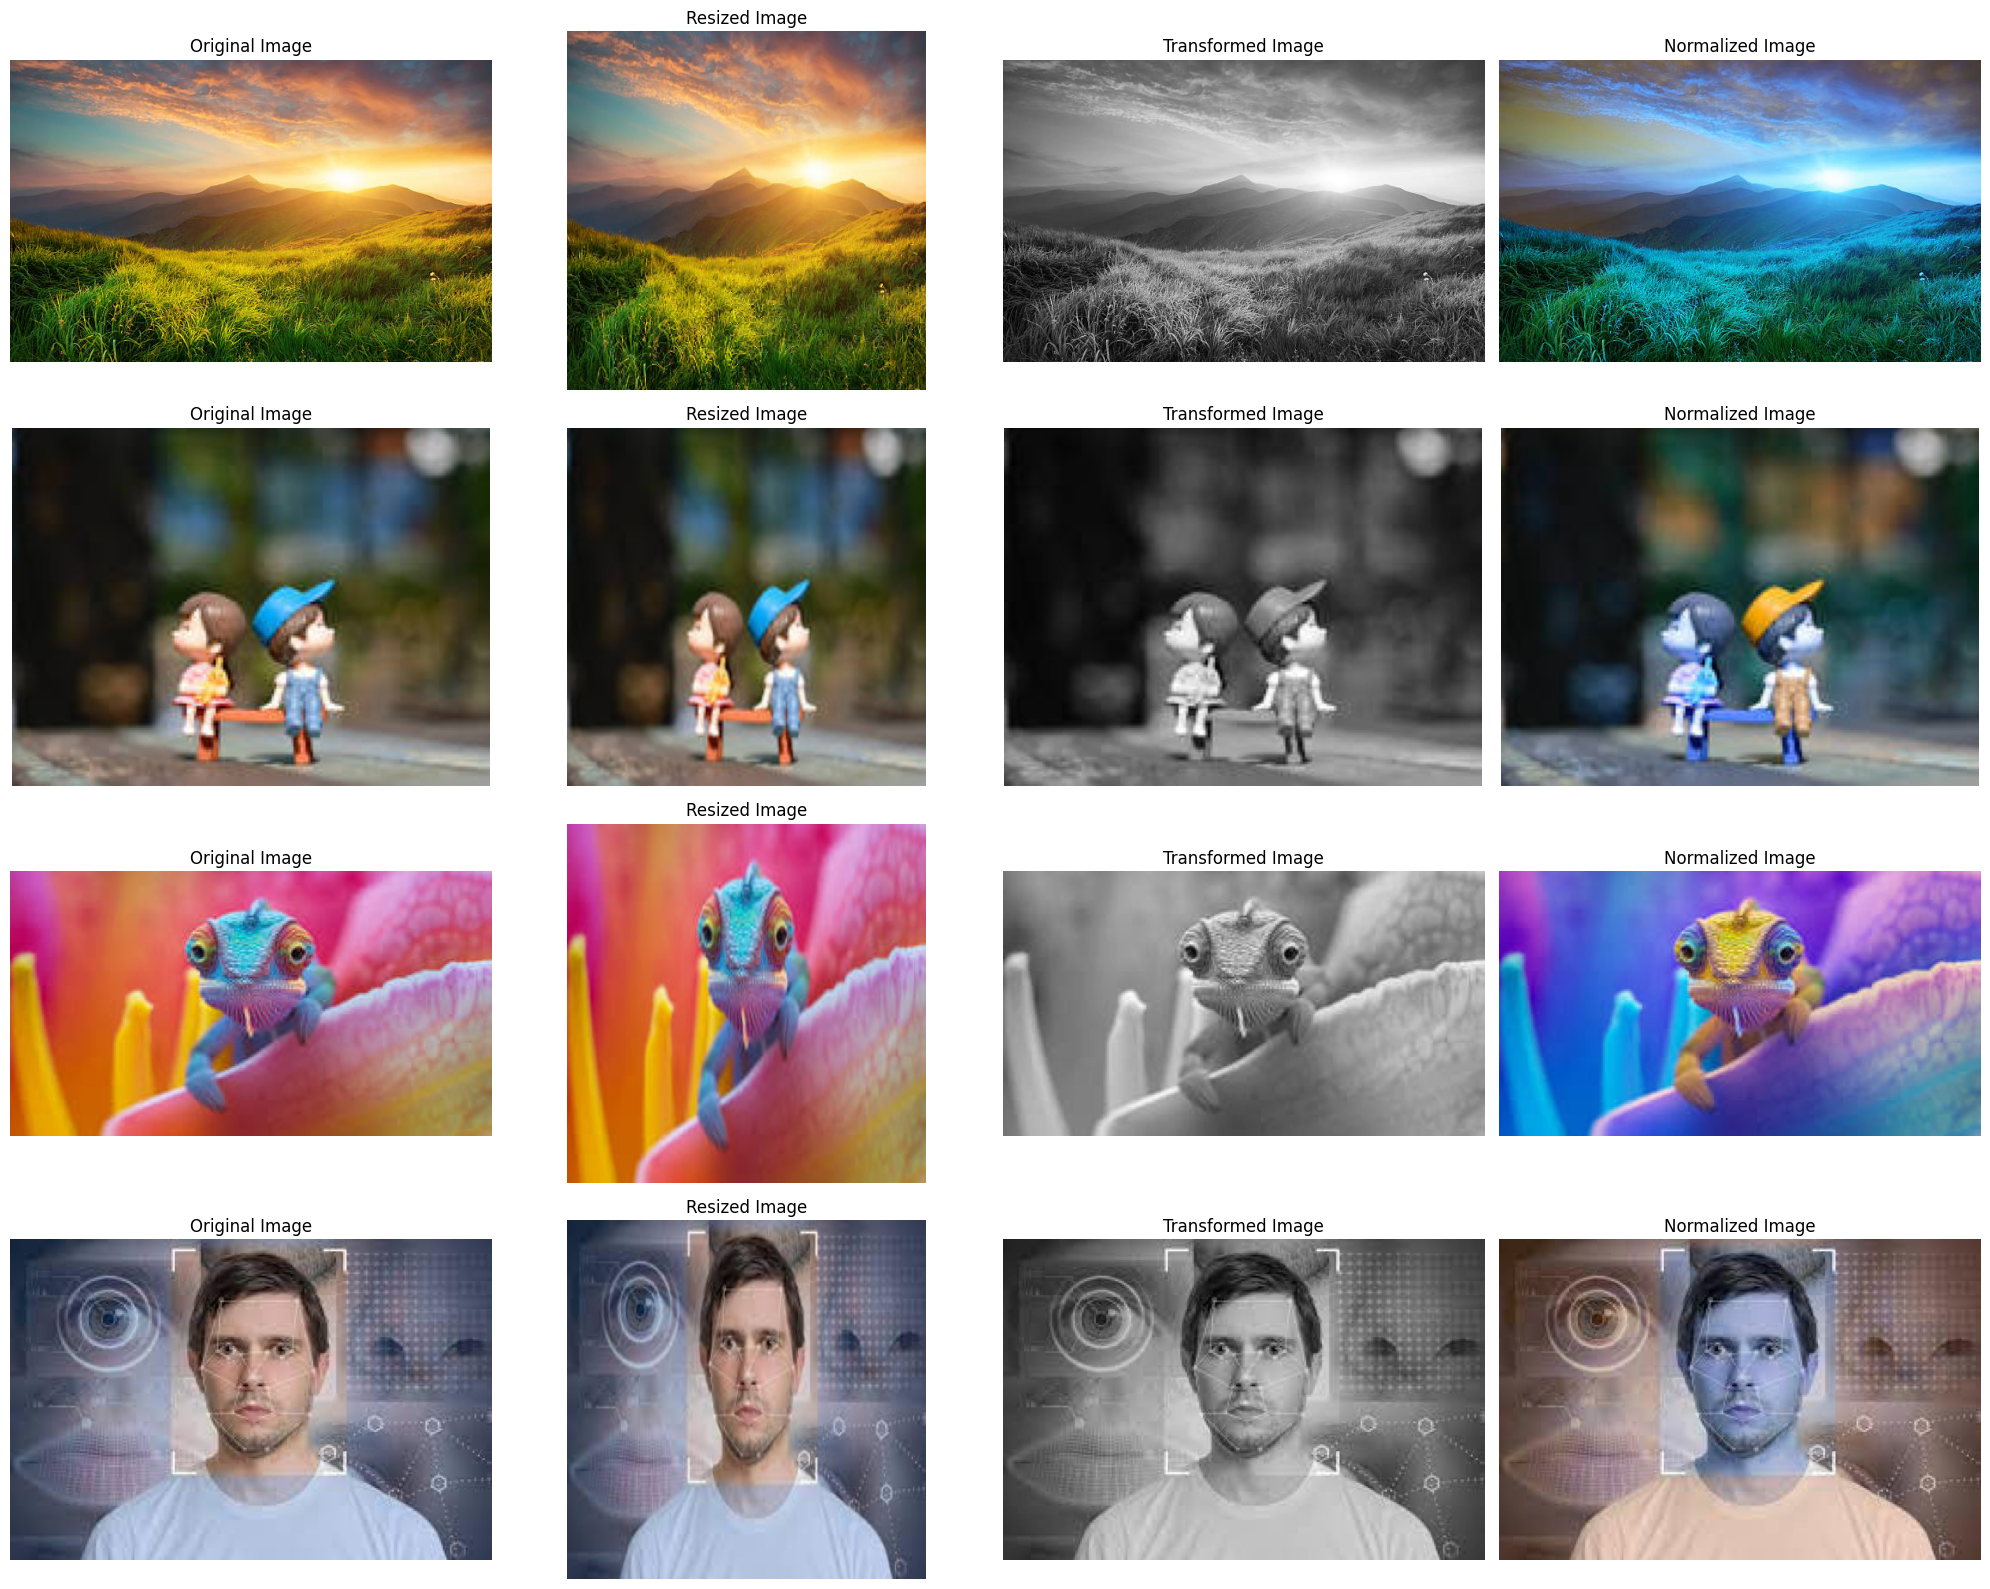

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_images_from_folder(folder_path):
    images = []
    image_files = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            images.append(img)
            image_files.append(filename)
    return images, image_files

def save_image(image, output_folder, filename):
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, image)

def resize_images(images, output_folder, new_size=(300, 300)):
    resized_images = []
    for img, filename in zip(images, image_files):
        resized_img = cv2.resize(img, new_size)
        resized_images.append(resized_img)
        save_image(resized_img, output_folder, f"resized_{filename}")
    return resized_images

def apply_color_transform(images, output_folder):
    transformed_images = []
    for img, filename in zip(images, image_files):
        transformed_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        transformed_images.append(transformed_img)
        save_image(transformed_img, output_folder, f"transformed_{filename}")
    return transformed_images

def normalize_images(images, output_folder):
    normalized_images = []
    for img, filename in zip(images, image_files):
        # Example normalization: Convert to float32 and scale to [0, 1]
        normalized_img = img.astype('float32') / 255.0
        normalized_images.append((normalized_img * 255).astype('uint8'))
        save_image((normalized_img * 255).astype('uint8'), output_folder, f"normalized_{filename}")
    return normalized_images

folder_path = r"Image Input"
output_folder = r"output"

# Read images from the folder
images, image_files = read_images_from_folder(folder_path)

# Create output folders if they don't exist
os.makedirs(os.path.join(output_folder, "resized"), exist_ok=True)
os.makedirs(os.path.join(output_folder, "transformed"), exist_ok=True)
os.makedirs(os.path.join(output_folder, "normalized"), exist_ok=True)

# Perform image processing and save processed images
resized_images = resize_images(images, os.path.join(output_folder, "resized"))
transformed_images = apply_color_transform(images, os.path.join(output_folder, "transformed"))
normalized_images = normalize_images(images, os.path.join(output_folder, "normalized"))

# Plot original, resized, transformed, and normalized images
# (Plotting code is the same as in the previous version of the code)
num_rows = len(images)
if num_rows == 0:
    print("No images found in the specified folder.")
    exit()

# Plot original, resized, transformed, and normalized images
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 4*num_rows))

# If there's only one row, axes will be a 1D array, so we need to handle it accordingly
if num_rows == 1:
    axes = [axes]

for i in range(num_rows):
    axes[i][0].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    axes[i][0].set_title('Original Image')
    axes[i][0].axis('off')
    axes[i][1].imshow(cv2.cvtColor(resized_images[i], cv2.COLOR_BGR2RGB))
    axes[i][1].set_title('Resized Image')
    axes[i][1].axis('off')
    axes[i][2].imshow(transformed_images[i], cmap='gray')
    axes[i][2].set_title('Transformed Image')
    axes[i][2].axis('off')
    axes[i][3].imshow(normalized_images[i], cmap='gray')
    axes[i][3].set_title('Normalized Image')
    axes[i][3].axis('off')

plt.tight_layout()
plt.show()